# Lab 1

- [ ] DESCRIZIONI VELOCI DI GRAFICI + DATI

## The main question

The datasets chosen for this laboratory project concern activated and terminated employment contracts in Lombardy. 
The goal is to get a prevision on the number of activated and terminated contracts based on parameters such date, educational qualification and geographical area. In this way it is possible to get an overwiew about the labour market based on the input data.

## Imports

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Datasets Analysis

The considered datasets are available on the Lombardy Region website at the following links:

[__Activated contracts__](https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-attivati/qbau-cyuc)

[__Terminated contracts__](https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-cessati/nwz3-p6vm)

### Datasets overview

In [2]:
# Loading and showing the first dataset
activated_work = pd.read_csv("Rapporti_di_lavoro_attivati.csv")
activated_work.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA


In [3]:
# Loading and showing the second dataset
terminated_work = pd.read_csv("Rapporti_di_lavoro_cessati.csv")
terminated_work.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,02/04/2019,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,08/06/2018,F,28,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,02/02/2016,F,20,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/01/2015,M,59,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,09/08/2017,M,61,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [4]:
print('Number of elements in the Activated dataset:''%d' %(activated_work.size / activated_work.columns.size))

Number of elements in the Activated dataset:9579794


In [5]:
print('Number of elements in the Terminated dataset: %d' %(terminated_work.size / terminated_work.columns.size))

Number of elements in the Terminated dataset: 3741394


In [6]:
# Low level info about Activated dataset - consider to remove it 
activated_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579794 entries, 0 to 9579793
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 657.8+ MB


In [7]:
# Low level info about Terminated dataset - consider to remove it 
terminated_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741394 entries, 0 to 3741393
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 256.9+ MB


From the dataset head we can understand that the dataset contains 9 columns:
- DATA
- GENERE
- SETTOREECONOMICODETTAGLIO
- TITOLODISTUDIO
- CONTRATTO
- MODALITADILAVORO 
- PROVINCIAIMPRESA
- ITALIANO

### Activated dataset columns description

| Name                      | Description                             |
|---------------------------|-----------------------------------------|
| DATA                      | Date in which the contract is activated |
| GENERE                    | Gender of the employee                  |
| ETA                       | Age of the employee                     |
| SETTOREECONOMICODETTAGLIO | Field of work                           |
| TITOLOSTUDIO              | Educational qualification               |
| CONTRATTO                 | Kind of job contract                    |
| MODALITALAVORO            | Working time                            |
| PROVINCIAIMPRESA          | Province where the employer is located  |
| ITALIANO                  | Nationality of the employee             |

### Terminated dataset columns description


| Name                      | Description                             |
|---------------------------|-----------------------------------------|
| DATA                      | Date in which the contract is terminated|
| GENERE                    | Gender of the fired employee            |
| ETA                       | Age of the fired employee               |
| SETTOREECONOMICODETTAGLIO | Field of work                           |
| TITOLOSTUDIO              | Educational qualification               |
| CONTRATTO                 | Kind of job contract                    |
| MODALITALAVORO            | Working time                            |
| PROVINCIAIMPRESA          | Province where the employer is located  |
| ITALIANO                  | Nationality of the fired employee       |

By reading the values in "ITALIANO" column in both datasets we notice that this name is not appropriate. We decide to rename it to "NAZIONALITA", which is the right translation of "nationality" 

In [8]:
activated_work.rename(columns={'ITALIANO':'NAZIONALITA'}, inplace=True)
terminated_work.rename(columns={'ITALIANO':'NAZIONALITA'}, inplace=True)

### Checking how many unique values for each column are in the datasets

In [9]:
print('\nUnique Values Count for each feature in Activated')
print(activated_work.nunique())

print('\nUnique Values Count for each feature in Terminated')
print(terminated_work.nunique())


Unique Values Count for each feature in Activated
DATA                         2001
GENERE                          2
ETA                           103
SETTOREECONOMICODETTAGLIO    1224
TITOLOSTUDIO                   12
CONTRATTO                      54
MODALITALAVORO                  5
PROVINCIAIMPRESA               12
NAZIONALITA                   199
dtype: int64

Unique Values Count for each feature in Terminated
DATA                         2323
GENERE                          2
ETA                           103
SETTOREECONOMICODETTAGLIO    1205
TITOLOSTUDIO                   12
CONTRATTO                      54
MODALITALAVORO                  5
PROVINCIAIMPRESA               12
NAZIONALITA                   197
dtype: int64


### Checking how many null values for each column are in the datasets

In [10]:
#Null Values count
print('\nNull Values Count for each feature in Activated')
print(activated_work.isnull().sum())

#Null Values count
print('\nNull Values Count for each feature in Terminated')
print(terminated_work.isnull().sum())


Null Values Count for each feature in Activated
DATA                              0
GENERE                            0
ETA                               0
SETTOREECONOMICODETTAGLIO      2888
TITOLOSTUDIO                    580
CONTRATTO                         0
MODALITALAVORO               440779
PROVINCIAIMPRESA                  0
NAZIONALITA                       0
dtype: int64

Null Values Count for each feature in Terminated
DATA                            0
GENERE                          0
ETA                             0
SETTOREECONOMICODETTAGLIO    1019
TITOLOSTUDIO                  440
CONTRATTO                       0
MODALITALAVORO                  0
PROVINCIAIMPRESA                0
NAZIONALITA                     0
dtype: int64


### Checking how many duplicated values are in the datasets

In [11]:
print('\nNumber of duplicated rows in Activated:'+' %s' %activated_work.duplicated().value_counts()[1])

print('\nNumber of duplicated row in Terminated:'+' %s' %terminated_work.duplicated().value_counts()[1])


Number of duplicated rows in Activated: 1009435

Number of duplicated row in Terminated: 131656


## Merging Dataset

We merge both datasets by adding the column "TIPOLOGIA". The possible values in this new column are "ATTIVATO" and "TERMINATO". Where a value is equal to "ATTIVATO", the row is from the Activated dataset, whereas when a value is equal to "TERMINATO", the row is from the Terminated dataset.

In [12]:
activated_work['TIPOLOGIA'] = 'ATTIVATO'
terminated_work['TIPOLOGIA'] = 'TERMINATO'

In [13]:
total = [activated_work, terminated_work]

result = pd.concat(total)

result_df = pd.DataFrame(result) #check if redundant

## Graphical Analysis

In [14]:
tempDF = result_df.copy()
tempDF['DATA'] = pd.to_datetime(tempDF['DATA'], errors = 'coerce', format='%d/%m/%Y')
tempDF['YEAR']= tempDF['DATA'].dt.year
tempDF['MONTH']= tempDF['DATA'].dt.month
#2600 entry is ignored in the following plots, workaround because it exceeds representation limit
#insert it manually, 12/11/2600

### Boxplot on Year

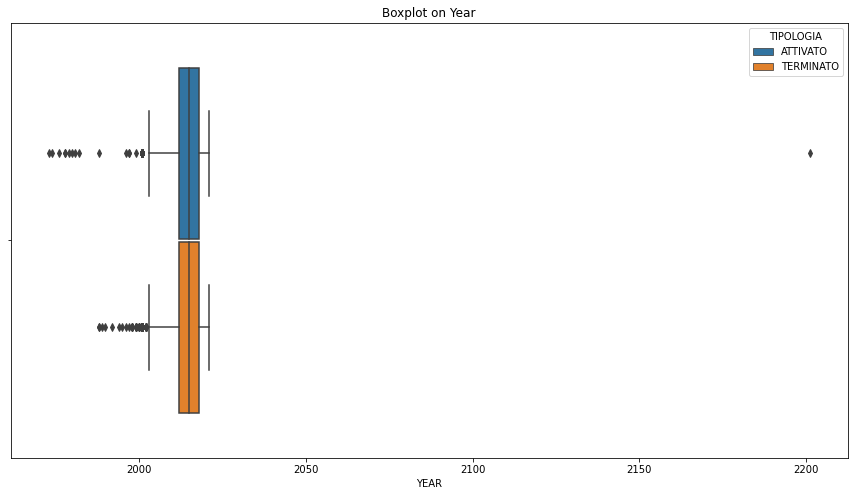

In [15]:
ax = sb.boxplot(x=tempDF['YEAR'], y=[""]*len(tempDF), hue=tempDF['TIPOLOGIA'])
# Workaround cause bug, y needs to be filled with dummy data
ax.set_title("Boxplot on Year")
plt.gcf().set_size_inches(15, 8)
plt.show()
# TODO: add description of bloxplot (outliers because of impossible year value)

### Countplot on Year

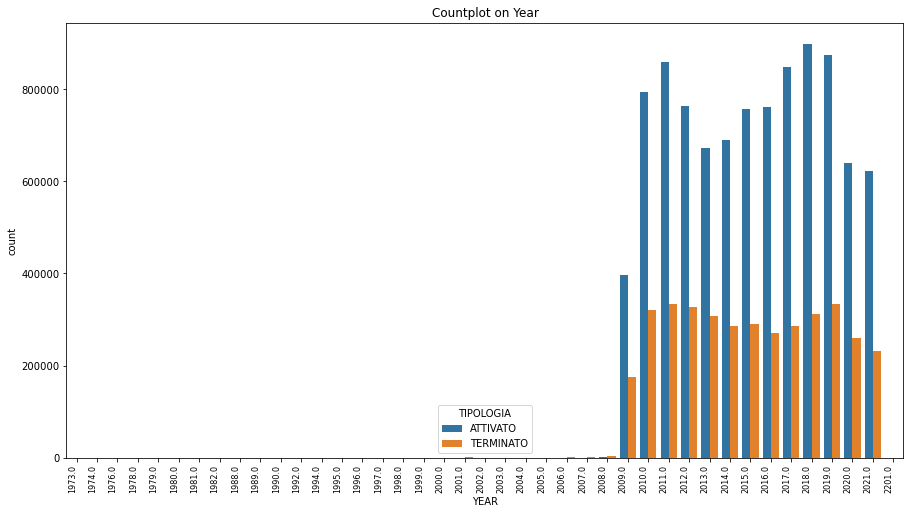

In [16]:
ax = sb.countplot(data=tempDF, x='YEAR', hue = 'TIPOLOGIA')
ax.set_title("Countplot on Year")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", size="8")
plt.gcf().set_size_inches(15, 8)
plt.show()
#TODO: fix year label shown as float
#TODO: add description distribution: most entries are between 2009 and 2021

### Boxplot on Month

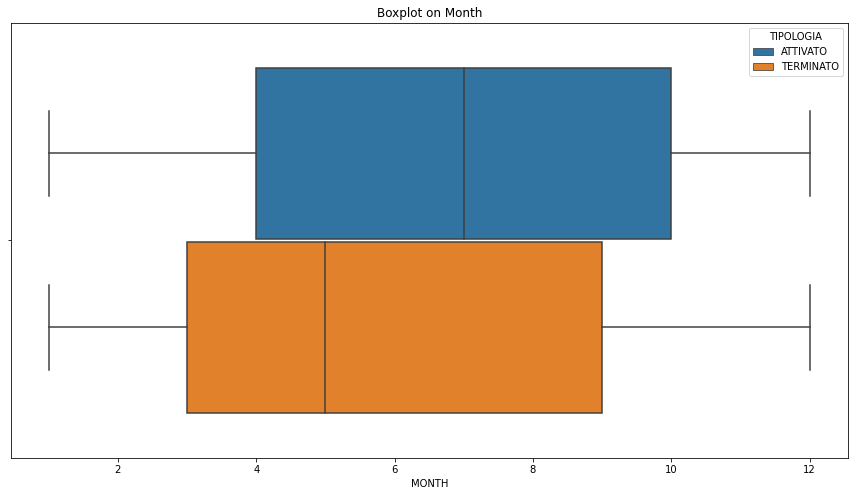

In [17]:
ax = sb.boxplot(data=tempDF, x="MONTH", y=[""]*len(tempDF), hue = 'TIPOLOGIA')
# Workaround cause bug, y needs to be filled with dummy data
ax.set_title("Boxplot on Month")
plt.gcf().set_size_inches(15, 8)
plt.show()
#TODO: add description: most of entries are between march and october

### Countplot on Genere

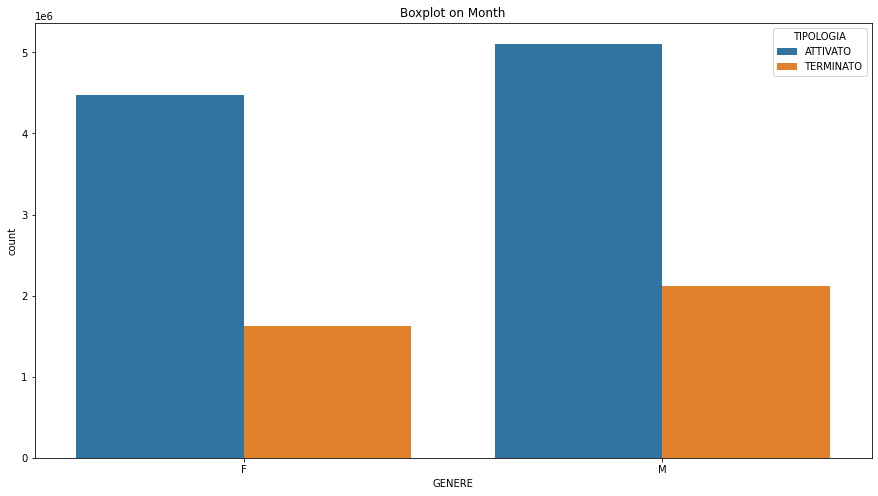

In [18]:
ax = sb.countplot(data=result_df, x="GENERE", hue="TIPOLOGIA")
ax.set_title("Boxplot on Month")
plt.gcf().set_size_inches(15, 8)
plt.show()
#TODO: add description about more male hired/fired than female

### Boxplot GENERE vs ETA

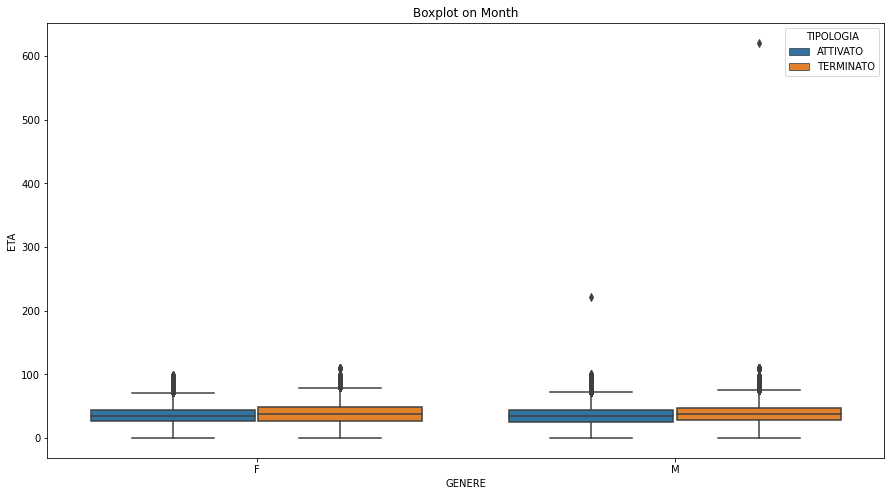

In [19]:
ax =  sb.boxplot(x="GENERE", y="ETA", hue="TIPOLOGIA", data=result_df)
ax.set_title("Boxplot on Month")
plt.gcf().set_size_inches(15, 8)
plt.show()

From this boxplot we can understand that some data are wrong, since there are values higher than 80 years represented in the plot as outliers.
From the following graph we can understand better the distribution of the feature 'ETA'

### Countplot on ETA

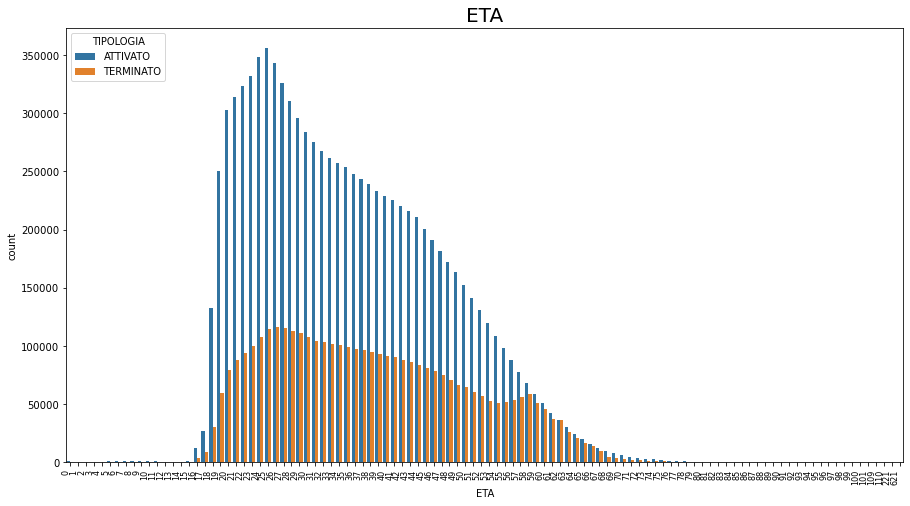

In [20]:
ax = sb.countplot(data=result_df, x="ETA", hue="TIPOLOGIA")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", size="8")
plt.gcf().set_size_inches(15, 8)
ax.set_title("ETA", fontsize = 20)
plt.show()

### Barplot on SETTOREECONOMICODETTAGLIO Activated

'SETTOREECONOMICODETTAGLIO' contains 1224 unique values, therefore we will show the first 20 values

In [21]:
sr = activated_work.groupby('SETTOREECONOMICODETTAGLIO').size().sort_values(ascending=False)[:20]

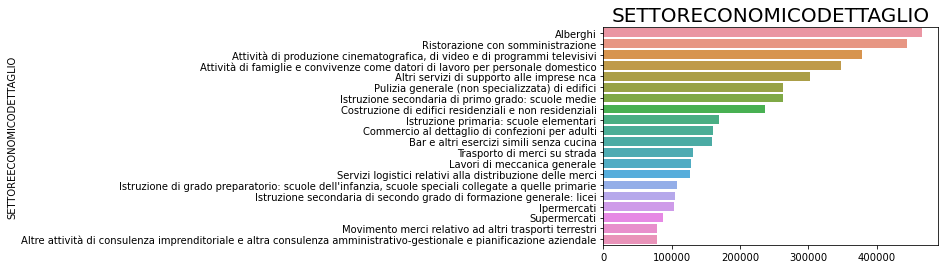

In [22]:
ax = sb.barplot(x=sr.values, y=sr.index)
ax.set_title("SETTORECONOMICODETTAGLIO", fontsize = 20)
plt.show()

### Barplot on SETTOREECONOMICODETTAGLIO Terminated

In [23]:
sr = terminated_work.groupby('SETTOREECONOMICODETTAGLIO').size().sort_values(ascending=False)[:20]

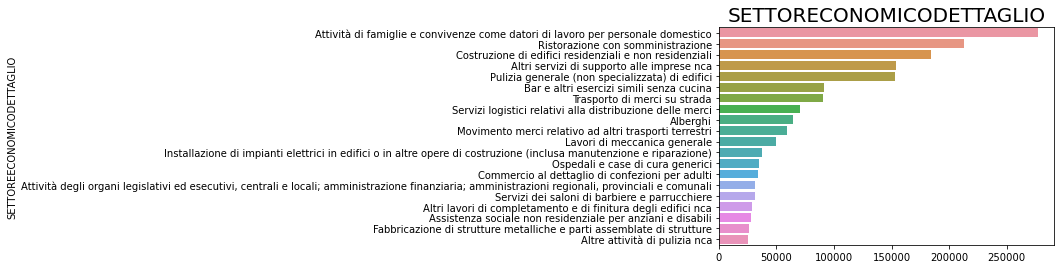

In [24]:
ax = sb.barplot(x=sr.values, y=sr.index) 
ax.set_title("SETTORECONOMICODETTAGLIO", fontsize = 20)
plt.show()

### Countplot on TITOLOSTUDIO

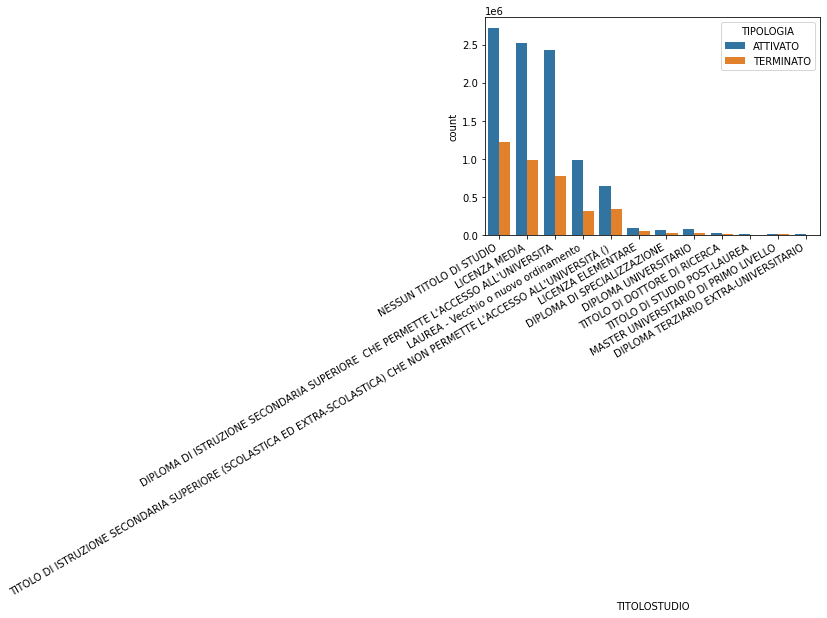

In [25]:
ax = sb.countplot(data=result_df, x="TITOLOSTUDIO", hue='TIPOLOGIA')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()
#TODO: fix label

### Barplot on CONTRATTO Activated

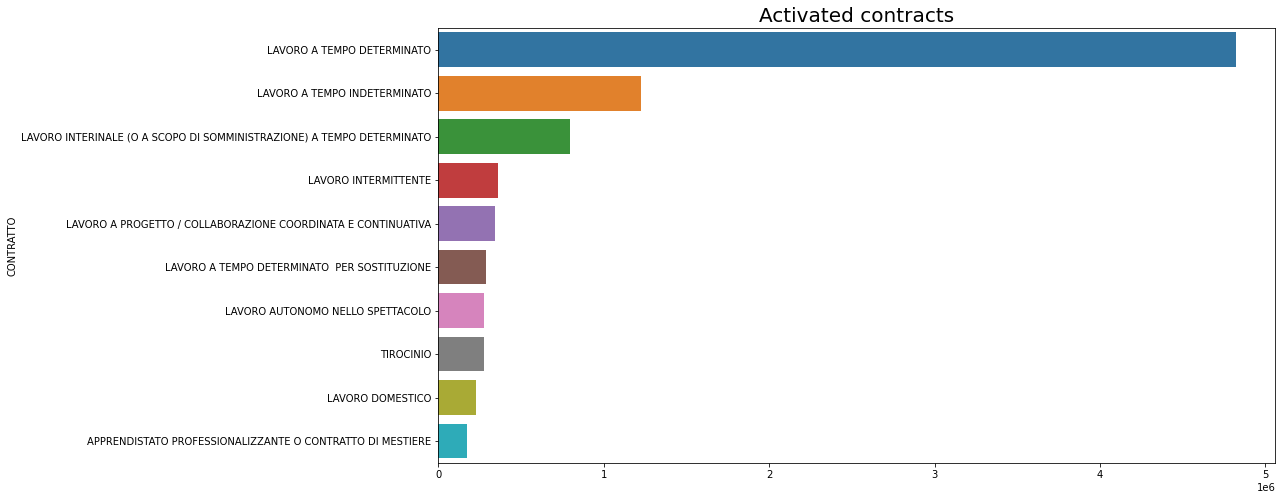

In [26]:
sr = activated_work.groupby('CONTRATTO').size().sort_values(ascending=False)[:10] #Show only first 10
ax = sb.barplot(x=sr.values, y=sr.index)
ax.set_title("Activated contracts", fontsize="20")
plt.gcf().set_size_inches(15, 8)
plt.show()

### Barplot on CONTRATTO Terminated

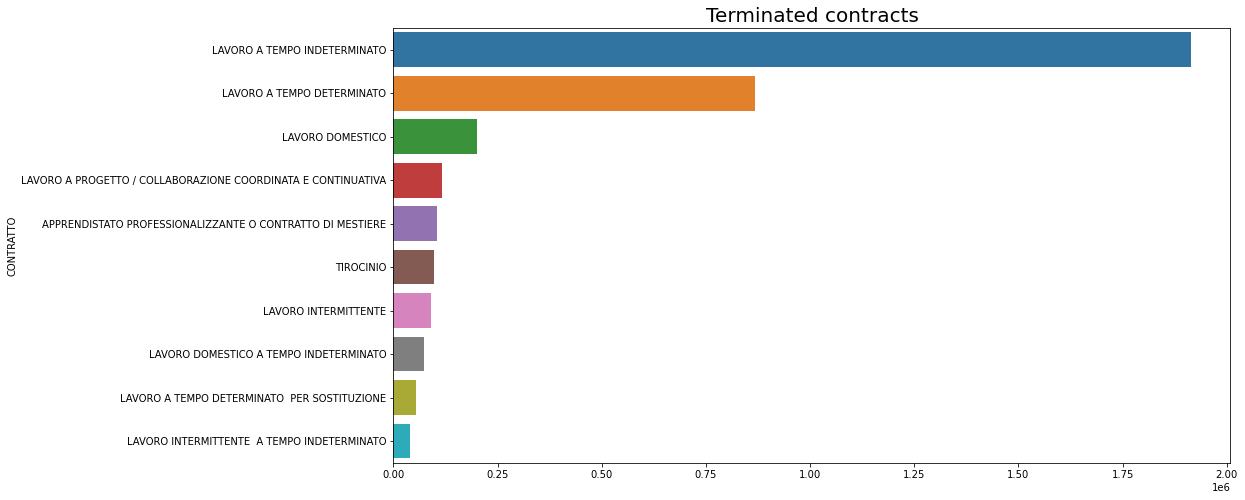

In [27]:
sr = terminated_work.groupby('CONTRATTO').size().sort_values(ascending=False)[:10] #Show only first 10
ax = sb.barplot(x=sr.values, y=sr.index)
ax.set_title("Terminated contracts", fontsize="20")
plt.gcf().set_size_inches(15, 8)

plt.show()

### Countplot on MODALITALAVORO

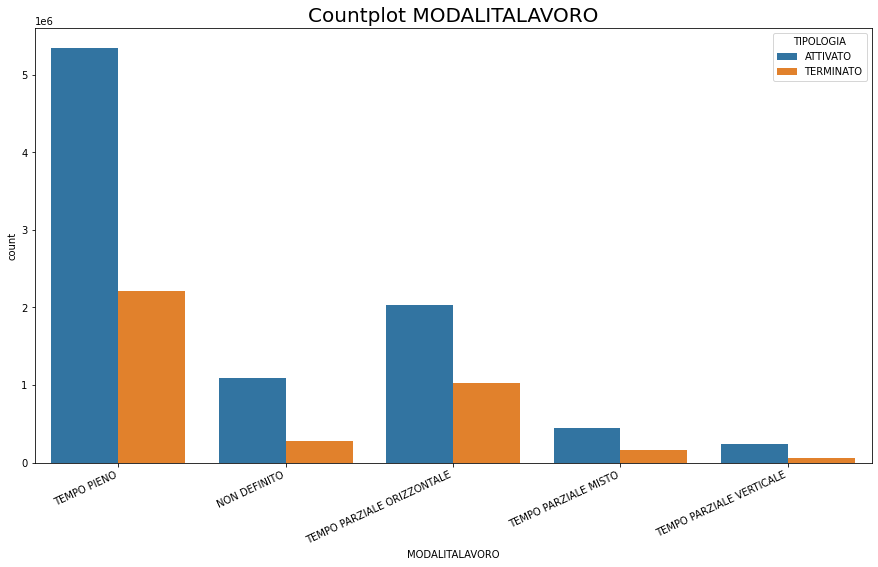

In [28]:
ax = sb.countplot(data=result_df, x="MODALITALAVORO", hue="TIPOLOGIA")
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
ax.set_title("Countplot MODALITALAVORO", fontsize="20")
plt.gcf().set_size_inches(15, 8)
plt.show()

### Countplot on PROVINCIAIMPRESA

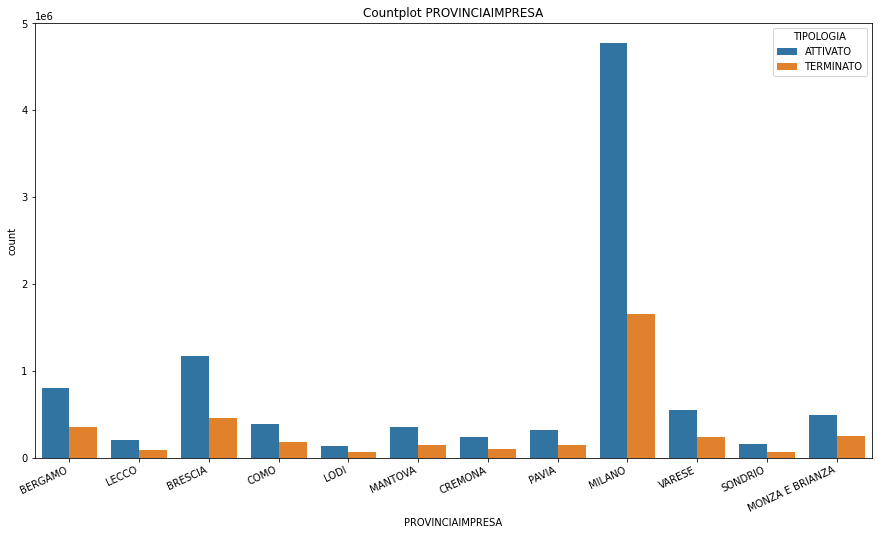

In [29]:
ax = sb.countplot(data=result_df, x="PROVINCIAIMPRESA", hue="TIPOLOGIA")
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
ax.set_title("Countplot PROVINCIAIMPRESA")
plt.gcf().set_size_inches(15, 8)
plt.show()

### Barplot on NAZIONALITA Activated

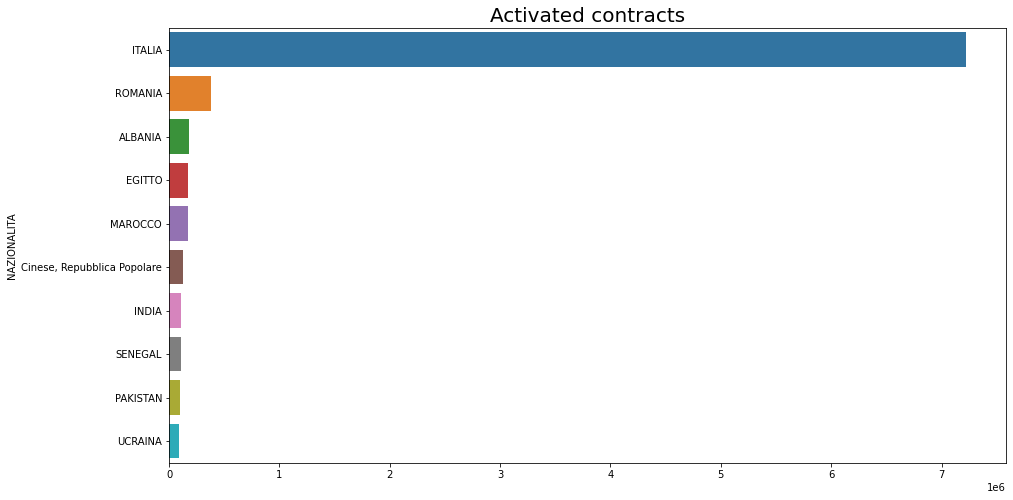

In [30]:
sr = activated_work.groupby('NAZIONALITA').size().sort_values(ascending=False)[:10] # Show only first 10
ax = sb.barplot(x=sr.values, y=sr.index)
ax.set_title("Activated contracts", fontsize="20")
plt.gcf().set_size_inches(15, 8)

### Barplot on NAZIONALITA Terminated

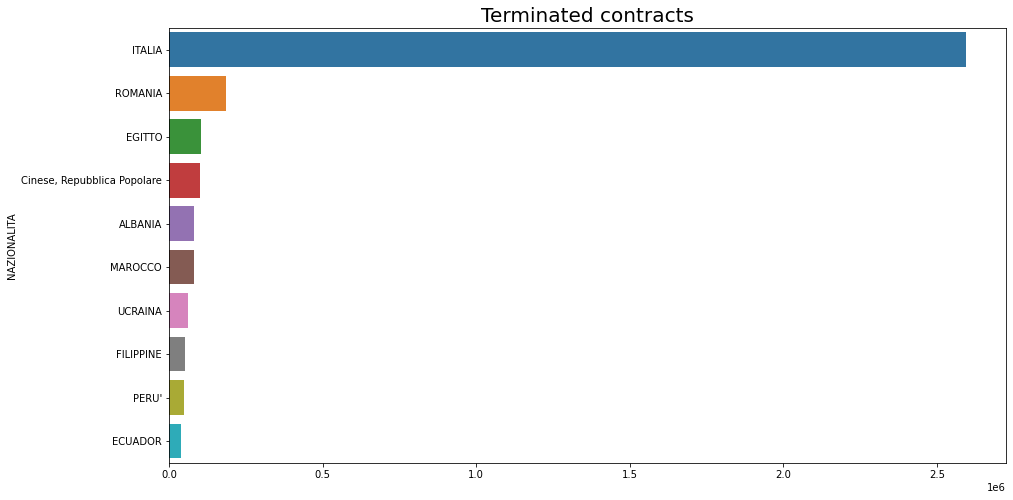

In [31]:
sr = terminated_work.groupby('NAZIONALITA').size().sort_values(ascending=False)[:10]
ax = sb.barplot(x=sr.values, y=sr.index)
ax.set_title("Terminated contracts", fontsize="20")
plt.gcf().set_size_inches(15, 8)